# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [84]:
!pip install pycrf
!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

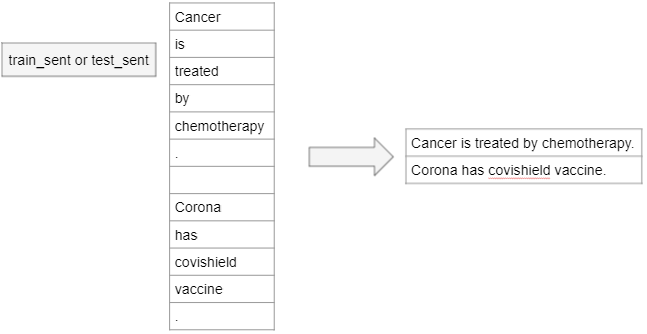

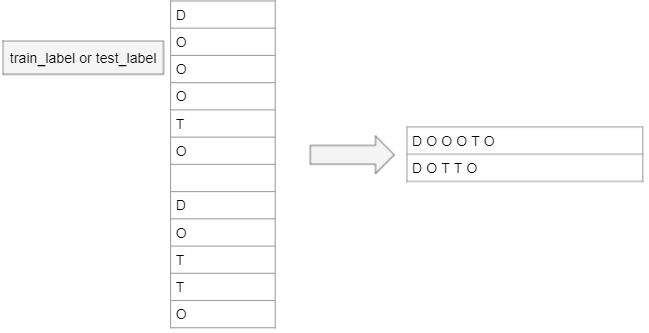

In [85]:
with open('train_sent', 'r') as train_sent_file:
  train_sentences = train_sent_file.readlines()

with open('train_label', 'r') as train_labels_file:
  train_labels = train_labels_file.readlines()

with open('test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.readlines()

with open('test_label', 'r') as test_labels_file:
  test_labels = test_labels_file.readlines()

## Construction of sentences for word

### 1. For Train data

In [86]:
train_sent = []
sent = []
for i in train_sentences:
     if i == '\n':
          train_sent.append(' '.join(sent))
          sent = []
     else:
          sent.append(i.replace('\n',''))

In [87]:
#Checking sentences
train_sent

['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )',
 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )',
 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )',
 "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",
 "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )",
 'Cesarean rates at tertiary care hospitals should be compared with rates at community hospitals only after correcting for dissimilar patient groups or gestational age',
 'In the third trimester , the amniotic fluid index ( AFI ) may be affected by maternal fluid 

### 2. For Test data

In [88]:
test_sent = []
sent = []
for i in test_sentences:
     if i == '\n':
          test_sent.append(' '.join(sent))
          sent = []
     else:
          sent.append(i.replace('\n',''))

In [89]:
#Checking sentence for test data
test_sent

['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )',
 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration',
 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period',
 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )',
 'Fluctuations in ambient temperature are inversely correlated to changes in AFI',
 'This study tested the hypothesis that to reduce the rate of macrosomic infants in gestational diabetes cases , good glycemic control should be initiated before 34 completed gestational weeks',
 "In the `` early '' and `` late '' groups , mean gestational age at the beginning 

## For Labels data

### For Train labels

In [90]:
train_lab = []
sent = []
for i in train_labels:
     if i == '\n':
          train_lab.append(' '.join(sent))
          sent = []
     else:
          sent.append(i.replace('\n',''))

In [91]:
train_lab

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O',
 'O O O O O O O D D O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O T T',
 'O O O O O O O O',
 'O O O O O O O O O O O O O O O O O',
 'O O O O O O O O D D D D D D O T T T O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 '

### For test labels

In [92]:
test_lab = []
sent = []
for i in test_labels:
     if i == '\n':
          test_lab.append(' '.join(sent))
          sent = []
     else:
          sent.append(i.replace('\n',''))

In [93]:
test_lab

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O D D',
 'O O O O O O O O O O O O O O O O O O O D D O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O',
 'D D O O O O O O O O D O D D O O D D D',
 'O O O O O O O O O O O O D O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O D O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O 

### Count the number of sentences in the processed train and test dataset 

In [94]:
len(train_sent),len(test_sent)


(2599, 1056)

### Count the number of lines of labels in the processed train and test dataset.

In [95]:
len(train_lab),len(test_lab)

(2599, 1056)

##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [96]:
whole_list = train_sent + test_sent

In [97]:
len(whole_list)

3655

In [98]:
import pandas as pd
nouns = []
from tqdm import tqdm
for sent in tqdm(whole_list) : 
    doc = model(sent)
    for tok in doc:
        if tok.pos_=="NOUN" or tok.pos_=="PROPN" :
            nouns.append(tok.lemma_.lower())

100%|██████████| 3655/3655 [00:19<00:00, 191.47it/s]


### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [99]:
pd.Series(nouns).value_counts().head(25) 

patient         569
treatment       316
%               246
study           235
cancer          226
cell            203
therapy         182
effect          181
disease         169
group           145
case            132
lung            120
gene            112
year            105
rate            103
use              91
chemotherapy     91
trial            90
conclusion       89
woman            89
result           87
analysis         86
protein          82
response         81
risk             78
dtype: int64

## Defining features for CRF





In [100]:
# Let's define the features to get the feature value for one word.


#Define a function to get the above defined features for a word.

def getFeaturesForOneWord(sentence, poslist, pos):
  word = sentence[pos]

  features = [
    'POS_TAG =' + poslist[pos],
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper(),
    'POS_TAG =' + poslist[pos-1]
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 

  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence

  return features



## Getting the features

### Write a code/function to get the features for a sentence

In [101]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    poslist = [token.pos_ for token in model(sentence)]
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list,poslist, pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [102]:

# Define a function to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [103]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sent]

X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sent]


### Define the labels as the target variable for test and the train dataset

In [104]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in train_lab]

Y_test = [getLabelsInListForOneSentence(labels) for labels in test_lab]

## Build the CRF Model

In [105]:
# Build the CRF model.
import sklearn_crfsuite

from sklearn_crfsuite import metrics
crf = sklearn_crfsuite.CRF(max_iterations=100)
crf.fit(X_train, Y_train)

/Users/venkatraman/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(keep_tempfiles=None, max_iterations=100)

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [106]:
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [107]:
metrics.flat_f1_score(Y_test, Y_pred, average='weighted')

0.9049618632900791

##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

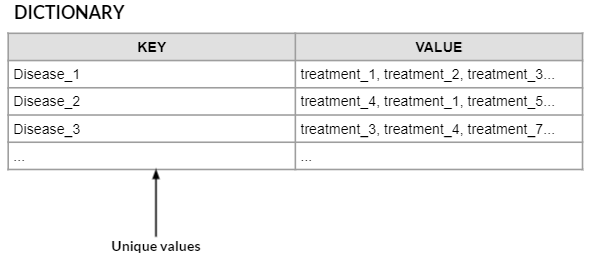

In [108]:
df = pd.DataFrame()
D = []
T = []
for i in range (len(Y_pred)):
    d = ""
    t = ""
    if ("T" in Y_pred[i]) and ("D" in Y_pred[i]) : 
        di = dict(zip(test_sent[i].split(),Y_pred[i]))
        for (word,label) in di.items():
            if label == 'O' :
                continue
            elif label == 'D' :
                d = d+" "+word
            else :
                t = t+" "+word
        D.append(d.strip(" "))
        T.append(t.strip(" "))

df['Disease'] = D
df['Treatment'] = T 

In [109]:
dictionary = {}
for i in df['Disease'].value_counts()[df["Disease"].value_counts() > 1].index:
    dictionary[i] = list(df[df['Disease'] == i]['Treatment'])
for i in df['Disease'].value_counts()[df["Disease"].value_counts() == 1].index:
    dictionary[i] = list(df[df['Disease'] == i]['Treatment'])

df2 = pd.DataFrame()
df2['Diseases'] = dictionary.keys()
df2['Treatment'] = dictionary.values()

/Users/venkatraman/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [110]:
print(df2[df2['Diseases'] == 'hereditary retinoblastoma']['Treatment'])

55    [radiotherapy]
Name: Treatment, dtype: object
